# Simple Harmonic Oscillator

[Source for Hamilton's Equations (Example 5)](https://www.math.unl.edu/~scohn1/8423/cvar7.pdf)

Hamilton's equations gives us $\displaystyle\dot{x} = \frac{p}{m}$ and $\dot{p} = -kq$ where $m$ is mass, $x$ is the displacement from equilibrium of the mass, $k$ is the spring constant and $p$ is the momentum.

To approximate the simple harmonic oscilator equation, we will use the Euler's method which simply uses $ {\displaystyle y_{i+1}=y_{i} + \dot{y_i}dt }$.

Our approximation function takes intial position $(x_0)$, initial moomentum $(p_0)$, time interval $dt$, maximum time $t_{max}$, mass $m$ and spring constant $k$ as inputs. Then it returns the displacement values $x$ for $t \in [0, t_{max}]$.

In [1]:
import numpy as np
import random

# Numeric Solution
def harmonic_oscillator_hamiltonian(x_0, p_0, dt, t_max, m, k):
  data_dict = {}
  t = np.arange(0, t_max, dt)
  x = np.zeros(len(t))
  x[0] = x_0
  p = np.zeros(len(t))
  p[0] = p_0

  for i in range(1, len(t)):
    x[i] = x[i - 1] + p[i - 1] * dt / m
    p[i] = p[i - 1] - k * x[i] * dt

  return [list(t), list(x), list(p)]


In [42]:
# Set parameters and generate true data
x_0 = 1
p_0 = 0
m = 1
k = 512
dt = 0.00001
t_max = 5

true_data = harmonic_oscillator_hamiltonian(x_0, p_0, dt, t_max, m, k)


C:\Users\ataer\AppData\Local\Temp\ipykernel_62336\1172016312.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(training_time, training_position, "ro", label="Training Position for Physical Loss", markersize=3, color="r")
C:\Users\ataer\AppData\Local\Temp\ipykernel_62336\1172016312.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(training_dict_uniform_times, training_dict_uniform_positions, "ro", label="Location Data for Data Loss", markersize=10, color="b")


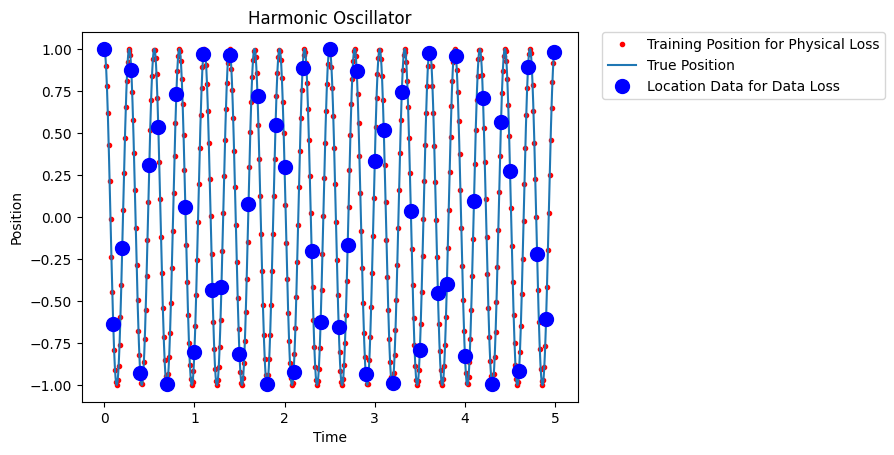

C:\Users\ataer\AppData\Local\Temp\ipykernel_62336\1172016312.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(training_time, training_momentum, "ro", label="Training Momentum for Physical Loss", markersize=3, color="r")
C:\Users\ataer\AppData\Local\Temp\ipykernel_62336\1172016312.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(training_dict_uniform_times, training_dict_uniform_momentums, "ro", label="Momentum Data for Data Loss", markersize=10, color="g")


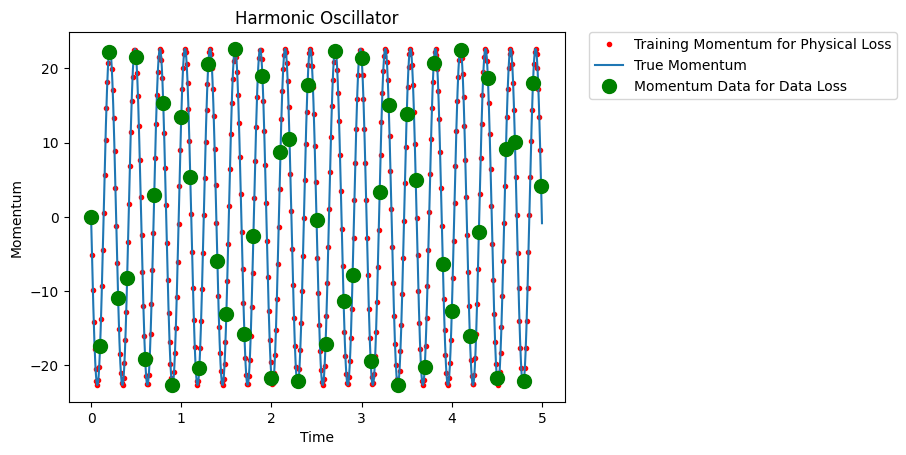

In [43]:
# Generate training data for physical loss and data loss

true_time, true_position, true_momentum = true_data[0], true_data[1], true_data[2]

# take every 20th data point from the true data for physical loss calculations
training_time = true_data[0][::100]
training_position = true_data[1][::100]
training_momentum = true_data[2][::100] 

# take every 500th data point from the true data for data loss calculations
training_dict_uniform_times = true_data[0][::1000] 
training_dict_uniform_positions = true_data[1][::1000]
training_dict_uniform_momentums = true_data[2][::1000]

# add the last data point to the training data
training_dict_uniform_times.append(training_time[-1])
training_dict_uniform_positions.append(training_position[-1])
training_dict_uniform_momentums.append(training_momentum[-1])

# Plot the results:
import matplotlib.pyplot as plt

plt.plot(training_time, training_position, "ro", label="Training Position for Physical Loss", markersize=3, color="r")
plt.plot(true_time, true_position, label="True Position")
plt.plot(training_dict_uniform_times, training_dict_uniform_positions, "ro", label="Location Data for Data Loss", markersize=10, color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # move legend to outside of figure
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Harmonic Oscillator")
plt.show()



plt.plot(training_time, training_momentum, "ro", label="Training Momentum for Physical Loss", markersize=3, color="r")
plt.plot(true_time, true_momentum, label="True Momentum")
plt.plot(training_dict_uniform_times, training_dict_uniform_momentums, "ro", label="Momentum Data for Data Loss", markersize=10, color="g")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # move legend to outside of figure
plt.xlabel("Time")
plt.ylabel("Momentum")
plt.title("Harmonic Oscillator")
plt.show()


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(0)

# model
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.linear_input = nn.Linear(1, hidden_size)  # input layer

        self.linear_1 = nn.Linear(hidden_size, hidden_size)
        self.linear_2 = nn.Linear(hidden_size, hidden_size)
        self.linear_3 = nn.Linear(hidden_size, hidden_size)
        #self.linear_4 = nn.Linear(hidden_size, hidden_size)
        #self.linear_5 = nn.Linear(hidden_size, hidden_size)
        #self.linear_6 = nn.Linear(hidden_size, hidden_size)

        self.linear_output = nn.Linear(hidden_size, 2) # output layer

    def forward(self, x):
        x = torch.tanh(self.linear_input(x))

        x = torch.tanh(self.linear_1(x))
        x = torch.tanh(self.linear_2(x))
        x = torch.tanh(self.linear_3(x))
        #x = torch.tanh(self.linear_4(x))
        #x = torch.tanh(self.linear_5(x))
        #x = torch.tanh(self.linear_6(x))

        x = self.linear_output(x)
        return x

# Create an instance of the neural network
hidden_size=10
model = Net(hidden_size=hidden_size)


In [45]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
# Scheduler with step size 1000 and gamma = 0.5
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.1)  # Adam optimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.75)

# Training loop
num_epochs =  20000

losses_total = []
losses_data = []
losses_physics = []
losses_energy = []

# Convert the training data to tensors
training_time_tensor = torch.tensor(training_time, dtype=torch.float32)
training_position_tensor = torch.tensor(training_position, dtype=torch.float32)

batch_size = 250
point_zero = torch.tensor([0.0], dtype=torch.float32).requires_grad_(True)
point_one=torch.tensor([1.0], dtype=torch.float32).requires_grad_(True)


# Create a DataLoader to handle batching and shuffling
dataset = TensorDataset(training_time_tensor, training_position_tensor)

data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
losses_total = []
losses_data_position = []
losses_data_momentum = []
losses_physics = []
losses_energy = []

for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()  # Zero the gradients

    for batch in data_loader:
        batch_time, batch_position = batch
        
        batch_time, batch_position = batch_time.requires_grad_(True).view(-1, 1), batch_position.requires_grad_(True).view(-1, 1)

        training_dict_uniform_times_tensor = torch.tensor(training_dict_uniform_times, dtype=torch.float32).view(-1, 1)
        training_dict_uniform_positions_tensor = torch.tensor(training_dict_uniform_positions, dtype=torch.float32).view(-1, 1)
        training_dict_uniform_momentums_tensor = torch.tensor(training_dict_uniform_momentums, dtype=torch.float32).view(-1, 1)

        ##################################################################################
        # Calculate the data loss
        
        data_outputs_position = model(training_dict_uniform_times_tensor)[:,0].view(-1,1)
        data_outputs_momentum = model(training_dict_uniform_times_tensor)[:,1].view(-1,1)  

        data_loss_position = criterion(data_outputs_position, training_dict_uniform_positions_tensor) 
        data_loss_momentum = criterion(data_outputs_momentum, training_dict_uniform_momentums_tensor)

        ##################################################################################
        # Calculate the physics loss

        physics_outputs = model(batch_time)
        xdot = torch.autograd.grad(physics_outputs[:,0:1], batch_time, torch.ones_like(physics_outputs[:,0:1]), create_graph=True)[0]
        pdot = torch.autograd.grad(physics_outputs[:,1:2], batch_time, torch.ones_like(physics_outputs[:,1:2]), create_graph=True)[0]
        
        physics_informed_value_loss = torch.mean((xdot-physics_outputs[:,1:2]/m)**2+(pdot+k*physics_outputs[:,0:1])**2)

        initial_outputs = model(point_zero)
        p_0_tensor=point_zero
        x_0_tensor=point_one
    
        initial_condition_loss_position = (initial_outputs[0] - x_0_tensor)**2
        initial_condition_loss_momentum = (initial_outputs[1] - p_0_tensor)**2
        
        physics_loss = (physics_informed_value_loss  + 1e4*initial_condition_loss_position + 1e4*initial_condition_loss_momentum )
    
        ##################################################################################
        # Calculate the energy loss
        energy_loss =torch.mean( (((1/2*k*physics_outputs[:,0:1]**2 + 1/2*(physics_outputs[:,1:2]**2)/m)) - ((1/2*k*x_0**2+ 1/2*(p_0**2)/m)))**2) 
      
        ##################################################################################
        # Calculate the total loss
        total_loss = 1e2*physics_loss + data_loss_position * 1e6 + data_loss_momentum * 1e4 
        # + energy_loss * 1e-2
        total_loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights

        losses_total.append(total_loss.item())
        losses_data_position.append(data_loss_position.item())
        losses_data_momentum.append(data_loss_momentum.item())
        losses_physics.append(physics_loss.item())
        losses_energy.append(energy_loss.item())

    if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Total_Loss: {total_loss.item()}, DataPosition_Loss: {data_loss_position.item()},Physics_Loss: {physics_loss.item()}, Energy_Loss: {energy_loss.item()}')

    scheduler.step()  # Update the learning rate
# Compute and print the average loss for the epoch
avg_total_loss = np.mean(losses_total)
avg_data_loss = np.mean(losses_data)
avg_physics_loss = np.mean(losses_physics)

print(f"Epoch {epoch+1}/{num_epochs}, Avg. Total Loss: {avg_total_loss}")


  0%|          | 0/20000 [00:00<?, ?it/s]

  5%|▌         | 1012/20000 [00:16<04:38, 68.16it/s]

Epoch [1000/20000], Total_Loss: 3090330.5, DataPosition_Loss: 0.48885154724121094,Physics_Loss: 901.508056640625, Energy_Loss: 65251.88671875


 10%|█         | 2013/20000 [00:32<04:03, 73.95it/s]

Epoch [2000/20000], Total_Loss: 3000720.5, DataPosition_Loss: 0.487173855304718,Physics_Loss: 130.62490844726562, Energy_Loss: 65390.8671875


 15%|█▌        | 3010/20000 [00:47<04:41, 60.31it/s]

Epoch [3000/20000], Total_Loss: 2972399.0, DataPosition_Loss: 0.48473212122917175,Physics_Loss: 461.322509765625, Energy_Loss: 64631.734375


 20%|██        | 4011/20000 [01:02<05:08, 51.83it/s]

Epoch [4000/20000], Total_Loss: 2869348.25, DataPosition_Loss: 0.4770137667655945,Physics_Loss: 147.03915405273438, Energy_Loss: 63347.5390625


 25%|██▌       | 5012/20000 [01:19<03:33, 70.20it/s]

Epoch [5000/20000], Total_Loss: 2813383.25, DataPosition_Loss: 0.463828444480896,Physics_Loss: 321.2237548828125, Energy_Loss: 62341.6015625


 30%|███       | 6008/20000 [01:34<03:22, 69.21it/s]

Epoch [6000/20000], Total_Loss: 2738680.25, DataPosition_Loss: 0.44897010922431946,Physics_Loss: 301.2870788574219, Energy_Loss: 59799.40234375


 35%|███▌      | 7010/20000 [01:49<04:25, 49.01it/s]

Epoch [7000/20000], Total_Loss: 2678187.25, DataPosition_Loss: 0.44377440214157104,Physics_Loss: 131.60276794433594, Energy_Loss: 58986.28125


 40%|████      | 8011/20000 [02:06<02:42, 73.73it/s]

Epoch [8000/20000], Total_Loss: 2647057.25, DataPosition_Loss: 0.4412470757961273,Physics_Loss: 84.46735382080078, Energy_Loss: 57834.80859375


 45%|████▌     | 9006/20000 [02:23<03:09, 57.93it/s]

Epoch [9000/20000], Total_Loss: 2631048.0, DataPosition_Loss: 0.4383088946342468,Physics_Loss: 108.12016296386719, Energy_Loss: 57923.9140625


 50%|█████     | 10012/20000 [02:40<02:36, 63.64it/s]

Epoch [10000/20000], Total_Loss: 2617233.75, DataPosition_Loss: 0.43506112694740295,Physics_Loss: 79.68085479736328, Energy_Loss: 57220.18359375


 55%|█████▌    | 11009/20000 [02:55<02:26, 61.40it/s]

Epoch [11000/20000], Total_Loss: 2608052.5, DataPosition_Loss: 0.4323941767215729,Physics_Loss: 62.01445007324219, Energy_Loss: 57418.3203125


 60%|██████    | 12005/20000 [03:14<02:54, 45.94it/s] 

Epoch [12000/20000], Total_Loss: 2605914.75, DataPosition_Loss: 0.43061789870262146,Physics_Loss: 94.75010681152344, Energy_Loss: 58568.64453125


 65%|██████▌   | 13005/20000 [03:38<02:38, 44.14it/s]

Epoch [13000/20000], Total_Loss: 2602002.5, DataPosition_Loss: 0.4291445314884186,Physics_Loss: 96.09791564941406, Energy_Loss: 57350.859375


 70%|███████   | 14004/20000 [03:59<02:15, 44.16it/s]

Epoch [14000/20000], Total_Loss: 2594753.0, DataPosition_Loss: 0.42805761098861694,Physics_Loss: 57.18035888671875, Energy_Loss: 58325.55859375


 75%|███████▌  | 15003/20000 [04:22<02:12, 37.67it/s]

Epoch [15000/20000], Total_Loss: 2590553.0, DataPosition_Loss: 0.42722395062446594,Physics_Loss: 48.73720169067383, Energy_Loss: 58589.37109375


 80%|████████  | 16003/20000 [04:46<01:29, 44.49it/s]

Epoch [16000/20000], Total_Loss: 2586226.25, DataPosition_Loss: 0.4265100061893463,Physics_Loss: 40.77326202392578, Energy_Loss: 57547.39453125


 85%|████████▌ | 17003/20000 [05:08<01:14, 40.17it/s]

Epoch [17000/20000], Total_Loss: 2583589.0, DataPosition_Loss: 0.42606744170188904,Physics_Loss: 45.424461364746094, Energy_Loss: 56557.86328125


 90%|█████████ | 18006/20000 [05:32<00:50, 39.82it/s]

Epoch [18000/20000], Total_Loss: 2579913.5, DataPosition_Loss: 0.4257158637046814,Physics_Loss: 33.27887725830078, Energy_Loss: 57641.203125


 95%|█████████▌| 19004/20000 [05:55<00:22, 45.08it/s]

Epoch [19000/20000], Total_Loss: 2576952.5, DataPosition_Loss: 0.42533037066459656,Physics_Loss: 24.57759666442871, Energy_Loss: 58466.5703125


100%|██████████| 20000/20000 [06:17<00:00, 53.04it/s]

Epoch [20000/20000], Total_Loss: 2576571.5, DataPosition_Loss: 0.42499396204948425,Physics_Loss: 38.091407775878906, Energy_Loss: 56640.7265625
Epoch 20000/20000, Avg. Total Loss: 2710132.3748875


Final loss: 0.0017825016984716058


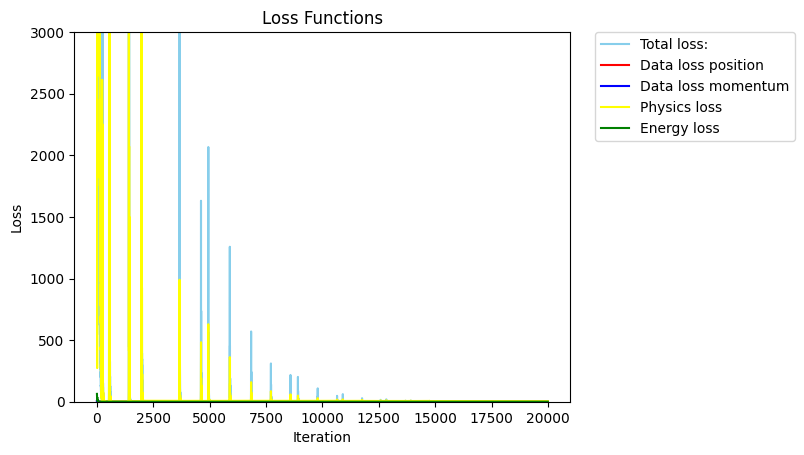

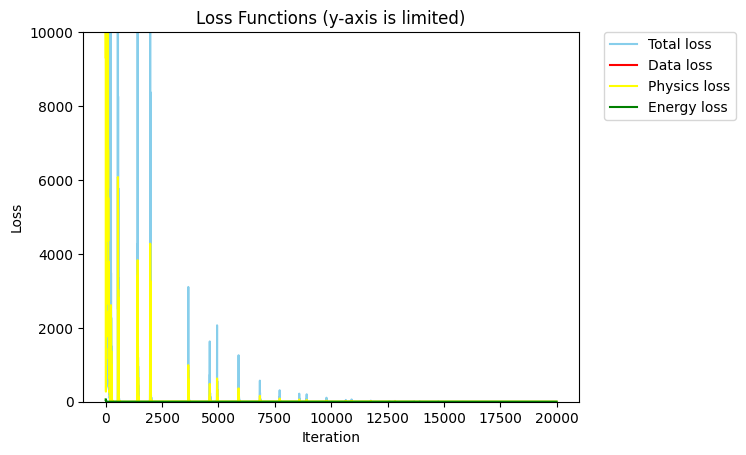

In [38]:
# Print the final loss
print('Final loss:', total_loss.item())

# Plot the loss curves
plt.plot(losses_total, label='Total loss:', color='skyblue')
plt.plot(losses_data_position, label='Data loss position', color='red')
plt.plot(losses_data_momentum, label='Data loss momentum', color='blue')
#plt.plot(losses_physics, label='Physics loss:#of data points:'f'{len(training_time)}'', color='yellow')
plt.plot(losses_physics, label='Physics loss', color='yellow')
plt.plot(losses_energy, label='Energy loss', color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Loss Functions")
plt.ylim(0, 3000)
plt.show()

# plot the same figure in log scale
plt.plot(losses_total, label='Total loss', color='skyblue')
plt.plot(losses_data, label='Data loss', color='red')
plt.plot(losses_physics, label='Physics loss', color='yellow')
plt.plot(losses_energy, label='Energy loss', color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Loss Functions (y-axis is limited)")
plt.ylim(0, 10000)
plt.show()

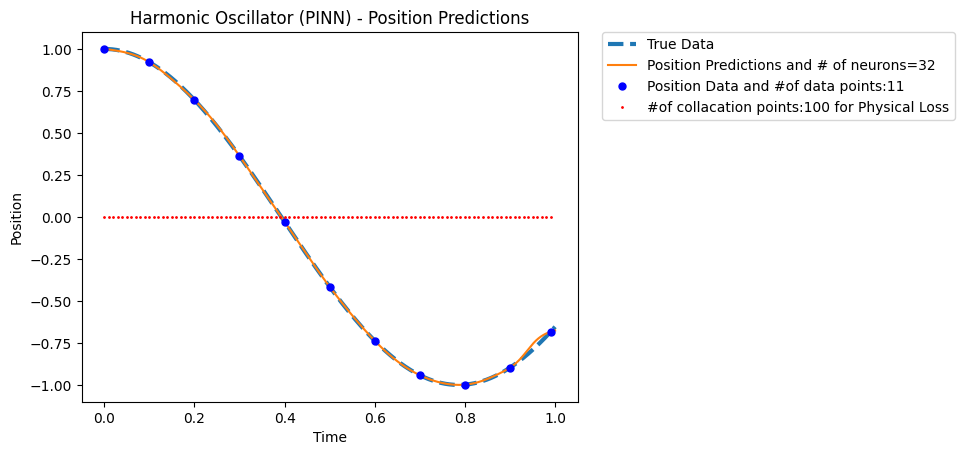

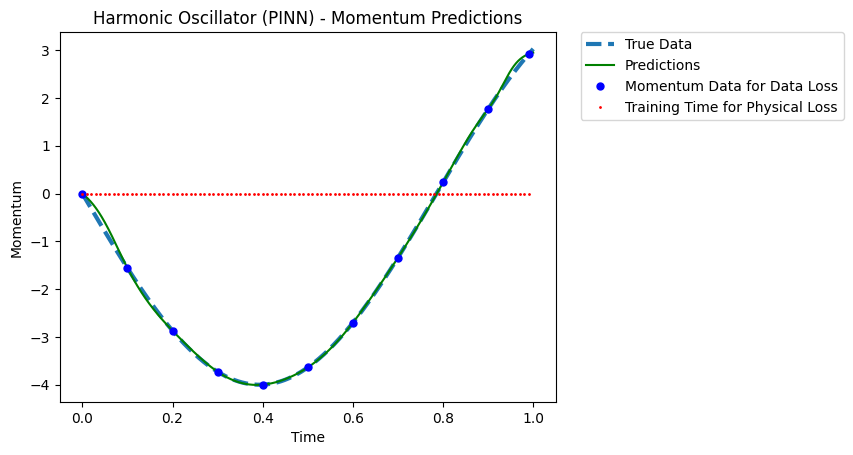

In [39]:
import torch
import matplotlib.pyplot as plt
import numpy as np


test_time = torch.tensor(true_time, dtype=torch.float32).view(-1, 1)

# Use the trained model to predict test positions
with torch.no_grad():
    test_predictions = model(test_time)


# Plot the results
plt.plot(true_time, true_position, label="True Data", linewidth=3, linestyle='dashed')

plt.plot(true_time, test_predictions[:,0], label = f'Position Predictions and # of neurons={hidden_size}')
plt.plot(training_dict_uniform_times, training_dict_uniform_positions, "bo", label= f'Position Data and #of data points:{len(training_dict_uniform_times)}', markersize=5)
plt.plot(training_time, np.zeros_like(training_time), "ro", label= f'#of collacation points:{len(training_time)} for Physical Loss', markersize=1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Harmonic Oscillator (PINN) - Position Predictions")
plt.show()

plt.plot(true_time, true_momentum, label="True Data", linewidth=3, linestyle='dashed')
plt.plot(true_time, test_predictions[:,1], label = "Predictions", color='green')
plt.plot(training_dict_uniform_times, training_dict_uniform_momentums, "bo", label="Momentum Data for Data Loss", markersize=5)
plt.plot(training_time, np.zeros_like(training_time), "ro", label="Training Time for Physical Loss", markersize=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time")
plt.ylabel("Momentum")
plt.title("Harmonic Oscillator (PINN) - Momentum Predictions") 
plt.show()


In [8]:
len(training_time)

100